### corneal endothelial state space
---
#### 1. formation of corneal endothelial state space with specific markers
#### 2. PCA

In [1]:
# Import Library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Set Config
CONFIG = {
    "data_dir": "./data_1.csv"
    , "genes": ["ATP1A1", "PITX2", "AQP1", "COL8A2", "ITGA3", "CDH2", "POU5F1", "SOX2", "LIN28A", "NANOG", "MYC", "KLF4"]
    , "color": sns.diverging_palette(255, 10, l=50, s=100, n=40, center="dark")
    , "cbar": {"shrink": 0.8}
    , "adopted_comp": 2
}

In [3]:
# Load Data
rawdata = pd.read_csv(CONFIG['data_dir'], index_col=0).T
for i in range(1, len(rawdata.T)):
    n1 = rawdata.columns[i-1]
    n2 = rawdata.columns[i]
    if n1==n2:
        rawdata.columns.values[i] = f"{rawdata.columns[i]}_1"

In [4]:
# Select genes as the 2 axes
df = rawdata.loc[:, CONFIG["genes"]]
df = df.iloc[:9, :]
df

GeneSymbol,ATP1A1,PITX2,AQP1,COL8A2,ITGA3,CDH2,POU5F1,SOX2,LIN28A,NANOG,MYC,KLF4
HCE-group1,9.114125,1588.102153,247.887377,122.190931,10.963849,1.476763,0.821862,0.001410,0.445786,1.502303,2.410593,64.359937
HCE-group2,24.585832,1221.184950,123.328584,88.830949,16.256282,1.426576,0.853486,0.001264,0.403638,0.510941,3.529948,100.814916
HCE-group3,21.710544,1352.184219,161.073294,109.156528,12.627556,1.483147,0.971022,0.004979,0.474888,0.597077,4.051584,113.589683
iPS-1,0.980838,2.618531,0.187213,0.174179,1.178248,0.880354,1474.361921,6.261664,423.497605,636.043224,1.666151,0.779962
iPS-2,1.008025,0.652076,0.155095,0.176582,1.139894,0.659189,1862.116990,5.609427,467.118250,836.706597,1.990727,0.501464
iPS-3,0.885488,1.431813,0.152369,0.229170,1.178427,0.661435,1705.141796,4.772133,405.188102,752.561670,1.642693,0.841452
CECSi -1,0.841194,55.407536,29.070218,3.779175,7.517935,5.393668,2.313475,2.000731,0.294893,0.567840,1.927042,2.364575
CECSi -2,0.970645,16.552627,15.516337,3.733721,6.399683,4.014567,1.516350,1.177263,0.829136,0.393615,1.125349,1.019672
CECSi -3,0.932343,29.825524,32.626108,3.750510,7.593373,3.730335,1.852669,0.849428,1.012468,0.612420,0.947458,1.111727


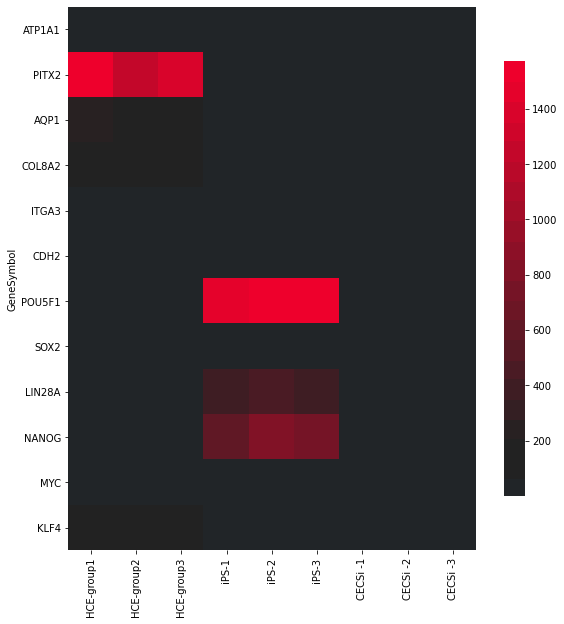

In [5]:
# TPM heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.T, cmap=CONFIG["color"], square=True, robust=True, center=df.mean().mean(), cbar=True, cbar_kws=CONFIG["cbar"])
plt.yticks(rotation=0)
plt.savefig("./CESS2/CESS2_heatmap.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)

In [6]:
# PCA
model = PCA(random_state=0)
model.fit(df)
Rdata = pd.DataFrame(model.transform(df), index=df.index, columns=[f"PCA{i}"for i in range(1, len(df)+1)])

In [7]:
# Contribution
temp = [
[f"{i:.2f}" for i in (model.explained_variance_ratio_ * 100)]
, [f"{i:.2f}" for i in (model.explained_variance_ratio_.cumsum() * 100)]
]

cont = pd.DataFrame(temp
            , index=['contribution [%]', 'cumulative contribution [%]']
            , columns=[f"PC_{i}" for i in range(1, len(df)+1)]
).T
cont.to_csv("./CESS2/CESS2_contribution.csv", index=True)
cont

,contribution [%],cumulative contribution [%]
PC_1,78.46,78.46
PC_2,21.45,99.91
PC_3,0.06,99.97
PC_4,0.03,100.00
PC_5,0.00,100.00
PC_6,0.00,100.00
PC_7,0.00,100.00
PC_8,0.00,100.00
PC_9,0.00,100.00


In [8]:
# Save Data as csv.
Pdata = pd.DataFrame(model.transform(df)[:, :CONFIG["adopted_comp"]]
                       , columns=[f"PCA{i}"for i in range(1, CONFIG["adopted_comp"]+1)]
                       , index=df.index
                      )
Pdata.to_csv(f"./CESS2/CESS2_PCAed_data_n={CONFIG['adopted_comp']}.csv", index=True)
Pdata

,PCA1,PCA2
HCE-group1,-1103.133238,-675.636884
HCE-group2,-917.621037,-347.228345
HCE-group3,-984.527036,-465.800953
iPS-1,1132.202314,-88.676750
iPS-2,1511.440400,-300.412872
iPS-3,1348.147974,-209.273681
CECSi -1,-339.228737,676.657986
CECSi -2,-320.049046,711.842401
CECSi -3,-327.231595,698.529099


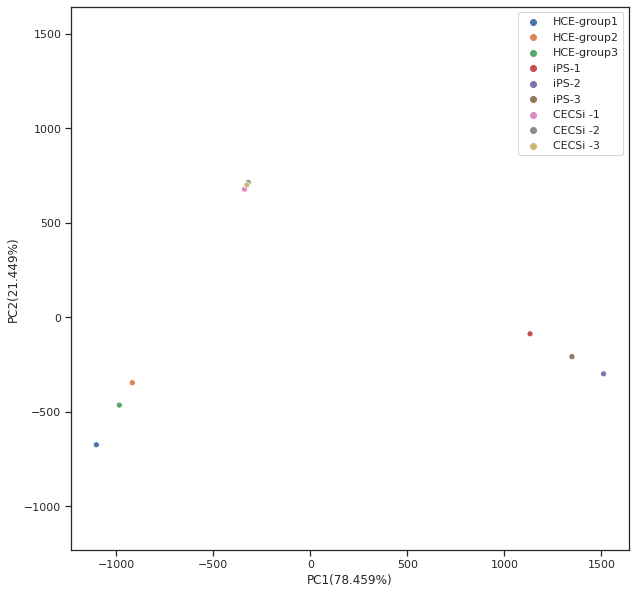

In [9]:
# Plot
sns.set() 
sns.set_style('ticks')
fig, ax = plt.subplots(figsize = (10, 10))
[pc1, pc2] = model.explained_variance_ratio_[0:2]
PC1 = round(100*pc1, 3)
PC2 = round(100*pc2, 3)
sns.scatterplot(x="PCA1", y="PCA2", data=Pdata, hue=Pdata.index)
ax.set(xlabel=f"PC1({PC1}%)",ylabel=f"PC2({PC2}%)")
ax.set_ylim(ax.get_xlim())
plt.savefig(f"./CESS2/CESS2_pca.png", facecolor="white", dpi=300, bbox_inches="tight", pad_inches=0.05)